<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

## 1. 데이터 전처리 (Text preprocessing)

In [61]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- 중복값을 제거하세요.

In [62]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv', index_col=0)

In [63]:
df.drop("url", axis = 1, inplace = True)
df.drop_duplicates(keep="first", inplace = True)
df.reset_index(drop = True, inplace = True)
df.head()

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
1,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
2,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...
3,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...
4,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell..."


In [64]:
df.shape

(757, 3)

### 1) 토큰을 정제합니다.

- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [68]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [69]:
tokens = []

for doc in tokenizer.pipe(df["description"]):
  doc_tokens = [re.sub(r'[^a-z0-9]', "", token.text.lower()) for token in doc  if (token.text != '\n') and (token.text != '\n\n')]
  tokens.append(doc_tokens)
df['tokens'] = tokens
df['tokens']

0      [job, details, description, essential, duties,...
1      [as, a, team, member, in, the, finance, and, i...
2      [overview, american, credit, acceptance, seeks...
3      [jp, morgans, corporate, , investment, bank, c...
4      [at, vystar, we, offer, competitive, pay, an, ...
                             ...                        
752    [our, expert, delivery, , business, intelligen...
753    [music, for, everyone, no, credit, card, neede...
754    [senior, data, , applied, scientist, do, you, ...
755    [ebay, is, a, global, commerce, leader, that, ...
756    [tldr, spring, is, accelerating, the, discover...
Name: tokens, Length: 757, dtype: object

### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [70]:
!pip install squarify

In [71]:
### 이곳에서 과제를 진행해 주세요 ###
from collections import Counter

def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [72]:
wc = word_count(df["tokens"])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
113,and,755,21864,1.0,0.056104,0.056104,0.997358
205,to,754,12694,2.0,0.032573,0.088677,0.996037
147,the,745,10538,3.0,0.027041,0.115717,0.984148
62,of,745,8839,4.0,0.022681,0.138398,0.984148
106,data,740,7425,5.0,0.019053,0.157451,0.977543
17,in,748,6769,6.0,0.017369,0.174821,0.988111
217,a,739,6436,7.0,0.016515,0.191336,0.976222
67,with,742,5727,8.0,0.014696,0.206031,0.980185
583,for,727,4132,9.0,0.010603,0.216634,0.960370
29,or,708,3812,10.0,0.009782,0.226416,0.935271


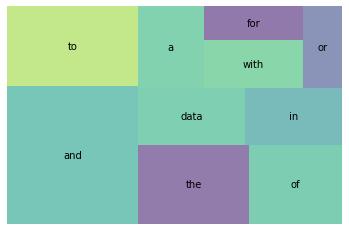

In [73]:
import squarify
import matplotlib.pyplot as plt

wc_top10 = wc[wc['rank'] <= 10]
squarify.plot(sizes=wc_top10['percent'], label=wc_top10['word'], alpha=0.6)
plt.axis('off')
plt.show()

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [74]:
### 이곳에서 과제를 진행해 주세요 ### 
STOP_WORDS = nlp.Defaults.stop_words.union(["data", "work"])

In [75]:
tokens = []

for doc in tokenizer.pipe(df['description']):
    
    doc_tokens = []
    
    for token in doc: 
        if re.sub(r'[^a-z0-9]',"",token.text.lower()) not in STOP_WORDS:
          if (token.text != '\n') and (token.text != '\n\n'):
              doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [76]:
wc = word_count(df['tokens'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
120,experience,687,3055,1.0,0.012632,0.012632,0.907530
501,business,518,1885,2.0,0.007794,0.020425,0.684280
195,team,548,1323,3.0,0.005470,0.025896,0.723910
567,learning,467,1193,4.0,0.004933,0.030828,0.616909
553,machine,468,1140,5.0,0.004714,0.035542,0.618230
873,science,460,1048,6.0,0.004333,0.039875,0.607662
32,ability,452,958,7.0,0.003961,0.043836,0.597094
98,analysis,436,896,8.0,0.003705,0.047541,0.575958
313,statistical,409,890,9.0,0.003680,0.051221,0.540291
9,skills,466,886,10.0,0.003663,0.054884,0.615588


### 5) Lemmatization 사용 효과를 분석해 봅니다.



- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**

In [77]:
### 이곳에서 과제를 진행해 주세요 ###
def get_lemmas(text):
    """
    표제어 추출
    """
    lemmas = []
    
    doc = nlp(text)

    for token in doc: 
        if re.sub(r'[^a-z0-9]',"",token.text.lower()) not in STOP_WORDS and ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
          if (token.text != '\n') and (token.text != '\n\n'): 
              lemmas.append(token.lemma_)
    
    return lemmas

In [78]:
df['lemmas'] = df['description'].apply(get_lemmas)
wc = word_count(df['lemmas'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
115,experience,708,3578,1.0,0.014566,0.014566,0.935271
352,team,630,2251,2.0,0.009164,0.023729,0.832232
406,business,528,2029,3.0,0.008260,0.031989,0.697490
95,analysis,536,1531,4.0,0.006233,0.038222,0.708058
119,model,527,1446,5.0,0.005887,0.044108,0.696169
100,skill,547,1205,6.0,0.004905,0.049014,0.722589
103,product,439,1196,7.0,0.004869,0.053882,0.579921
203,include,510,1178,8.0,0.004796,0.058678,0.673712
21,develop,521,1163,9.0,0.004734,0.063412,0.688243
308,analytic,426,1153,10.0,0.004694,0.068106,0.562748


## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 9) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - 답은 88번 인덱스를 포함합니다.
    - `max_features = 3000` 으로 설정합니다.
    - [88, 90, 91, 93, 94] 형태로 답을 입력해주세요

In [81]:
"""
args:
    ngram_range = (min_n, max_n), min_n 개~ max_n 개를 갖는 n-gram(n개의 연속적인 토큰)을 토큰으로 사용합니다.
    min_df = n : int, 최소 n개의 문서에 나타나는 토큰만 사용합니다.
    max_df = m : float(0~1), m * 100% 이상 문서에 나타나는 토큰은 제거합니다.
"""
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
TV_tuned = TfidfVectorizer(stop_words='english',
                           max_features=3000,
                           ngram_range=(1,2),
                           max_df=.7,
                           min_df=3)

dtm_TV = TV_tuned.fit_transform(df['description'])
dtm_TV = pd.DataFrame(dtm_TV.todense(), columns=TV_tuned.get_feature_names())
dtm_TV.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,10,10 years,100,11,12,14,15,18,...,years data,years experience,years industry,years professional,years related,years relevant,years work,yes,york,zillow
0,0.0,0.000000,0.053398,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.036384,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.058441,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.042957,0.0,0.0,0.0,0.0
3,0.0,0.037304,0.000000,0.0,0.039257,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.074305,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [82]:
from sklearn.neighbors import NearestNeighbors

# dtm을 사용히 NN 모델을 학습시킵니다. (디폴트)최근접 5 이웃.
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_TV)

NearestNeighbors(algorithm='kd_tree')

In [86]:
nn.kneighbors([dtm_TV.iloc[88]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


(array([[0.        , 1.21184788, 1.23651951, 1.23693757, 1.23780569]]),
 array([[ 88,  40, 221,  68, 121]]))

## 3. TF-IDF 이용한 텍스트 분류 진행하기

TF-IDF를 이용해 문장 혹은 문서를 벡터화한 경우, 이 벡터값을 이용해 문서 분류 태스크를 진행할 수 있습니다. 

현재 다루고 있는 데이터셋에는 label이 존재하지 않으므로, title 컬럼에 "Senior"가 있는지 없는지 여부를 통해 Senior 직무 여부를 분류하는 작업을 진행해보겠습니다.

### 1) title 컬럼에 "Senior" 문자열이 있으면 1, 없으면 0인 "Senior"라는 새로운 컬럼을 생성해주세요.

문항 7) 새롭게 만든 Senior 컬럼에서 값이 1인 (Senior O) 데이터의 개수는?

In [88]:
df['senior'] = df['title'].apply(lambda x : 1 if 'Senior' in x else 0)
df.senior.value_counts()

0    662
1     95
Name: senior, dtype: int64

문항 8) sklearn의 `train_test_split`을 통해 train 데이터와 valid 데이터로 나눈 후, `sklearn`의 `DecisionTreeClassifier`를 이용해 분류를 진행해주세요. 

단, x값은 위에서 학습한 dtm_tfidf를 그대로 이용해주세요. train_test_split과 DecisionTreeClassifier의 random_state을 42로 고정하고, test_size는 0.1로 설정해주세요.

학습을 완료한 후, test 데이터에 대한 예측을 진행하고 label 1에 대한 precision과 recall 값을 적어주세요

In [89]:
### 이곳에서 과제를 진행해 주세요 ### 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dtm_TV, df['senior'], test_size = 0.1, random_state = 42)

In [91]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [92]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        67
           1       0.50      0.44      0.47         9

    accuracy                           0.88        76
   macro avg       0.71      0.69      0.70        76
weighted avg       0.88      0.88      0.88        76

